<a href="https://colab.research.google.com/github/alferido/Loan_eligibility/blob/main/Notebook_VersionF_PFE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook Pour Le Projet de Fin d'études**

Prédiction des attributions de prêts bancaires à l'aide de l'apprentissage automatique

## **1. Imporatation des packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC 

## **2. Lecture de la base de données**

In [ ]:
df = pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## **3. Analyse Exploratoire des Données**

### **3.1. Analyse de forme**

In [ ]:
# La forme du dataframe
print(df.shape)
print("Le nombre de lignes :", df.shape[0])
print("Le nombre de colonnes :", df.shape[1])

(614, 13)
Le nombre de lignes : 614
Le nombre de colonnes : 13


In [ ]:
# Liste des colonnes
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
# Informations sur le dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# Les types de données
df.dtypes.value_counts()

object     8
float64    4
int64      1
dtype: int64

In [ ]:
# Descriptif statistique des données
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# Le nombre de valeurs manquantes de chaque variable du dataframe
df.isna().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

In [ ]:
# Le nombre total de valeurs manquantes
print("Le nombre total de variables manquantes est de", (df.isna().sum()).sum())

Le nombre total de variables manquantes est de 149


### **3.2. Analyse de fond**

#### **3.2.1. Analyse de la varible cible (Loan_Status)**

In [ ]:
# Analyse de la variable cible 'Loan_Status'
# Note: normalize=True pour avoir les resultats en pourcentage 
df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

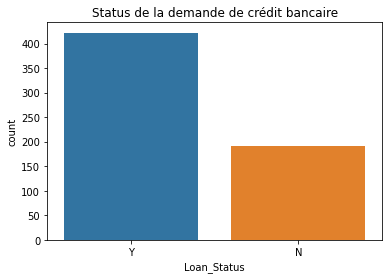

In [ ]:
# Visualisation de la variable target 'Loan_Status' avec un diagramme à barre
sns.countplot(x = 'Loan_Status', data = df)
plt.title("Status de la demande de crédit bancaire")
plt.show()

#### **3.2.2. Analyse des variables catégorielles nominales**

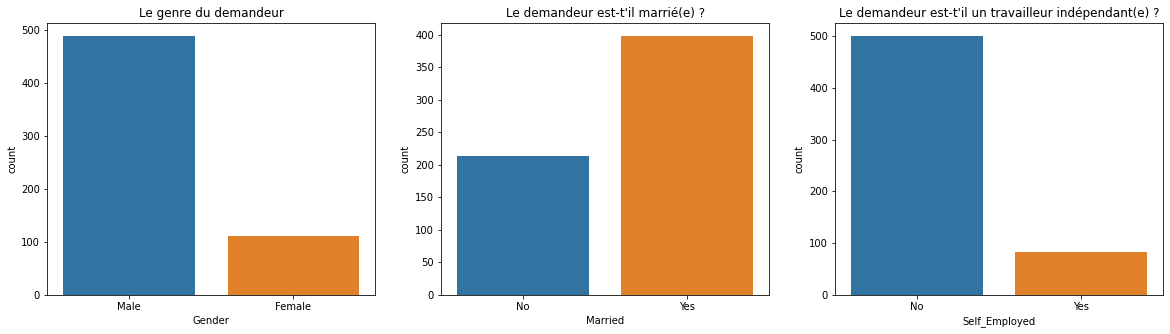

In [ ]:
# Analyse des variables catégorielle à l'aide des diagrammes à barre

plt.figure(figsize=(20, 5))

# Gender 
plt.subplot(1, 3, 1)
sns.countplot(x = 'Gender', data = df).set_title("Le genre du demandeur")

# Married
plt.subplot(1, 3, 2)
sns.countplot(x = 'Married', data = df).set_title("Le demandeur est-t'il marrié(e) ?")

# Self_Employed
plt.subplot(1, 3, 3)
sns.countplot(x = 'Self_Employed', data = df).set_title("Le demandeur est-t'il un travailleur indépendant(e) ?")

# On affiche les graphiques
plt.show()

#### **3.2.3. Analyse des variables catégorielles ordinales**

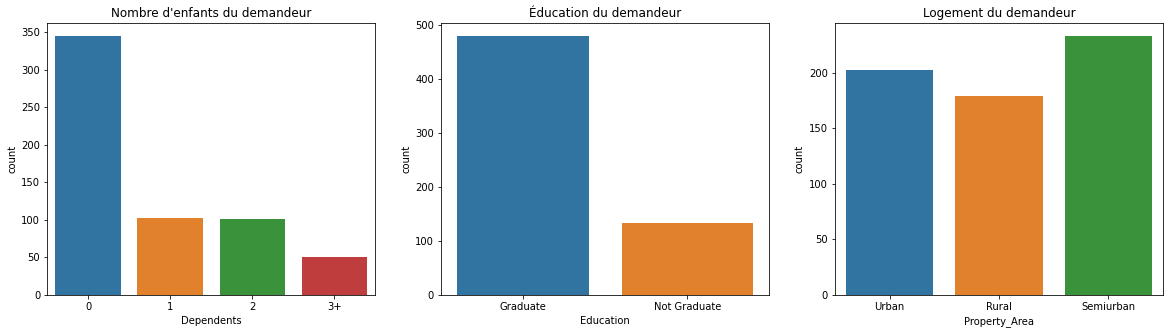

In [ ]:
# Analyse des variables ordinales catégorielles à l'aide des diagrammes à barres

plt.figure(figsize=(20, 5))

# Dependents 
plt.subplot(1, 3, 1)
sns.countplot(x = 'Dependents', data = df).set_title("Nombre d'enfants du demandeur") 

# Education
plt.subplot(1, 3, 2)
sns.countplot(x = 'Education', data = df).set_title("Éducation du demandeur") 

# Property_Area
plt.subplot(1, 3, 3)
sns.countplot(x = 'Property_Area', data = df).set_title("Logement du demandeur") 

# On affiche les graphiques
plt.show()

#### **3.2.4. Analyse des variables numériques**

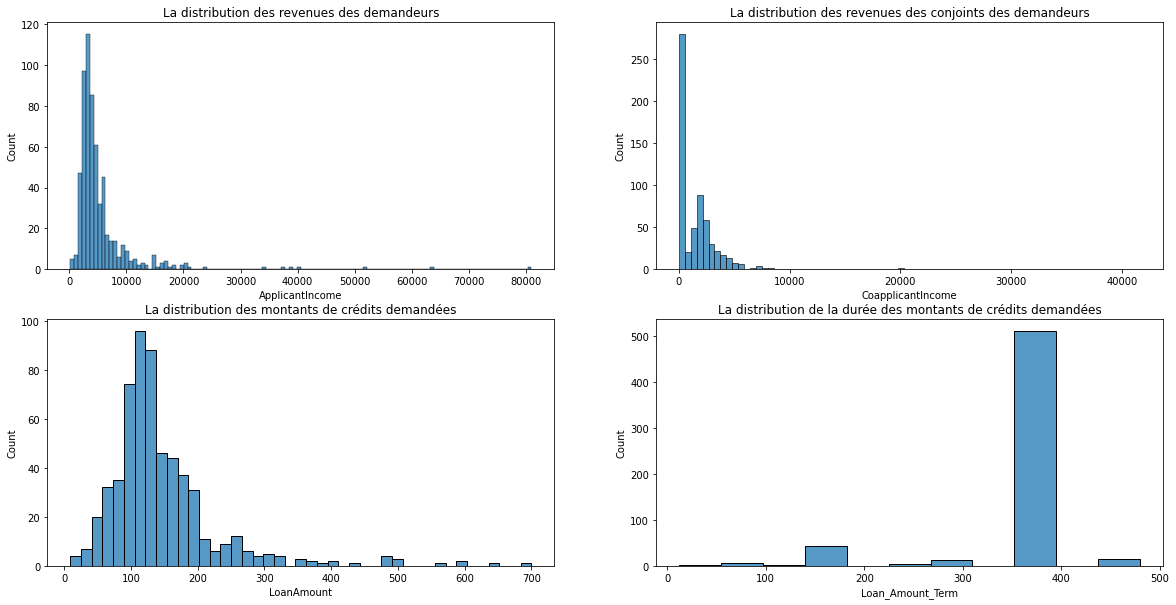

In [ ]:
# Analyse des variables numériques avec des histogrammes

plt.figure(figsize=(20, 10))

# ApplicantIncome
plt.subplot(2, 2, 1)
sns.histplot(x = 'ApplicantIncome', data = df).set_title("La distribution des revenues des demandeurs")

# CoapplicantIncome
plt.subplot(2, 2, 2)
sns.histplot(x = 'CoapplicantIncome', data = df).set_title("La distribution des revenues des conjoints des demandeurs")

# LoanAmount
plt.subplot(2, 2, 3)
sns.histplot(x ='LoanAmount', data = df).set_title("La distribution des montants de crédits demandées")

# Loan_Amount_Term
plt.subplot(2, 2, 4)
sns.histplot(x ='Loan_Amount_Term', data = df).set_title("La distribution de la durée des montants de crédits demandées")

# On affiche les graphiques
plt.show()

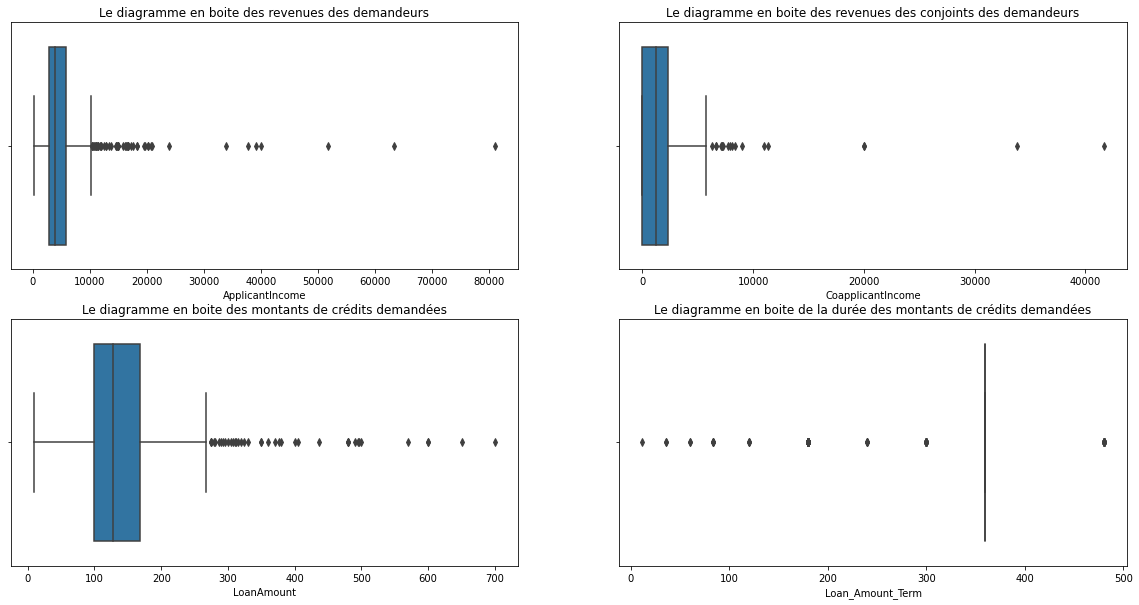

In [ ]:
# Analyse des variables numériques avec des diagramme en boite


plt.figure(figsize=(20, 10))

# ApplicantIncome
plt.subplot(2, 2, 1)
sns.boxplot(x = 'ApplicantIncome', data = df).set_title("Le diagramme en boite des revenues des demandeurs")

# CoapplicantIncome
plt.subplot(2, 2, 2)
sns.boxplot(x = 'CoapplicantIncome', data = df).set_title("Le diagramme en boite des revenues des conjoints des demandeurs")

# LoanAmount
plt.subplot(2, 2, 3)
sns.boxplot(x ='LoanAmount', data = df).set_title("Le diagramme en boite des montants de crédits demandées")

# Loan_Amount_Term
plt.subplot(2, 2, 4)
sns.boxplot(x ='Loan_Amount_Term', data = df).set_title("Le diagramme en boite de la durée des montants de crédits demandées")

# On affiche les graphiques
plt.show()

#### **3.2.5. Relation entre variables indépendante et la variable cible**

##### **Variables catégoriques / Variable cible**

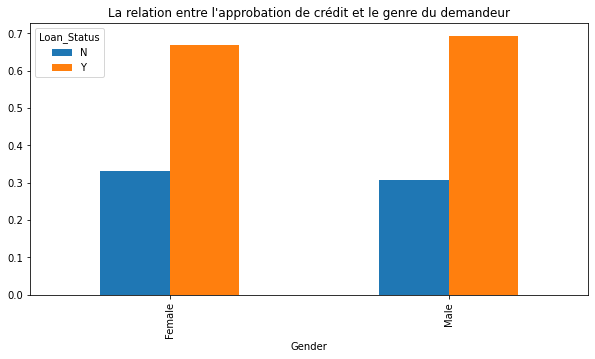

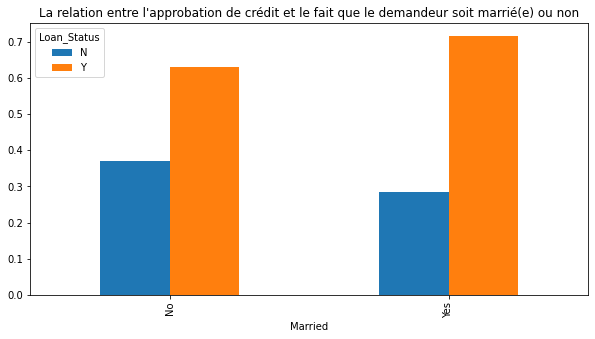

In [ ]:
# Note : la relation entre variables catégorique(puisque la variable cible aussi est catégorique) avec crosstab (tableau croisée) 
# puis on peux le visualiser avec un diagramme à barre empliées (en ajoutant l'option stacked=True) à plot()

# Gendre / Loan_Status
Gender=pd.crosstab(df['Gender'], df['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(10,5), title="La relation entre l'approbation de crédit et le genre du demandeur") 
plt.show()

# Married / Loan_Status
Married=pd.crosstab(df['Married'], df['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(10,5), title="La relation entre l'approbation de crédit et le fait que le demandeur soit marrié(e) ou non") 
plt.show()

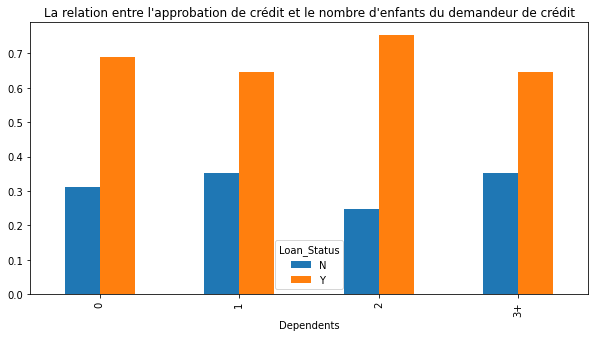

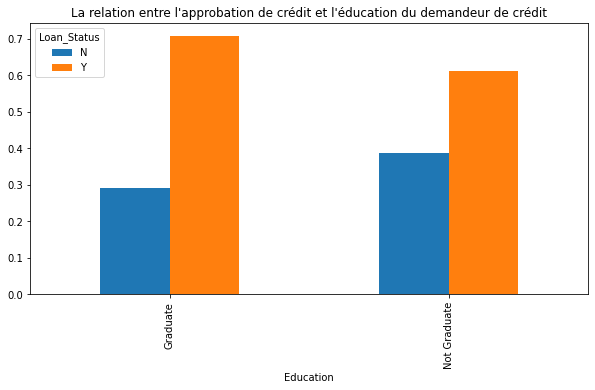

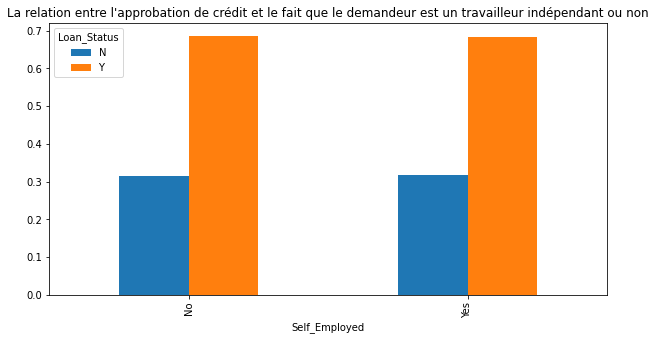

In [ ]:
# Dependents / Loan_Status
Dependents=pd.crosstab(df['Dependents'], df['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(10,5), title="La relation entre l'approbation de crédit et le nombre d'enfants du demandeur de crédit") 
plt.show()

# Education / Loan_Status
Education=pd.crosstab(df['Education'], df['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(10,5), title="La relation entre l'approbation de crédit et l'éducation du demandeur de crédit") 
plt.show()

# Self_Employed
Self_Employed=pd.crosstab(df['Self_Employed'], df['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(10,5), title="La relation entre l'approbation de crédit et le fait que le demandeur est un travailleur indépendant ou non") 
plt.show()

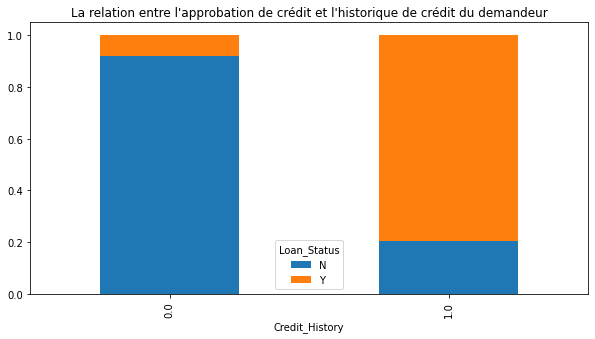

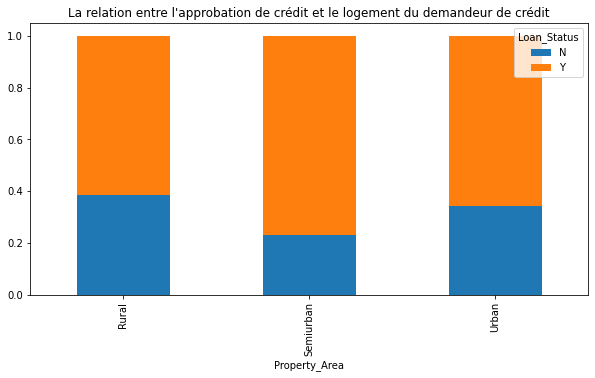

In [ ]:
# Credit_History / Loan_Status
Credit_History=pd.crosstab(df['Credit_History'], df['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,5), title="La relation entre l'approbation de crédit et l'historique de crédit du demandeur") 
plt.show()

# Property_Area / Loan_Status
Property_Area=pd.crosstab(df['Property_Area'], df['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,5), title="La relation entre l'approbation de crédit et le logement du demandeur de crédit") 
plt.show()



## **4. Résumé de l'Analyse Exploratoire des Données**

### **Analyse de forme**
- **La variable cible :** Loan_Status  

- **Lignes et colonnes :** 614 lignes et 13 colonnes 

- **Les types des variables :** 
    - **5 numériques :** 
        - ApplicantIncome
        - CoapplicantIncome
        - LoanAmount
        - Loan_Amount_Term
        - Credit_History
    - **5 catégorielles nominales** :
        - Loan_ID
        - Gender
        - Married
        - Loan_Status
        - Self_Employed
    - **3 catégorielles ordinales (ont un certain ordre):**
        - Dependents
        - Education
        - Property_Area  

- **Les valeurs manquantes :**
    - **Total :** 149 valeurs manquantes
    - ***Credit_History*** est la variable qui contient le plus de variables manquantes (50)


### **Analyse de fond**
- **Analyse de la variable cible :** 
    - **68.73%** des demandes de crédit ont été accordées
    - **31.27%** des demandes de crédit ont été refusées 

- **Analyse des variables catégorielles :** 
    - La majorité des demandeurs de crédits sont des hommes (plus de 80%)
    - La plupart des demandeurs de crédits sont mariés (plus de 65%)
    - Seulement 14% des demandeurs de crédits travaillent à leurs propres compte 

- **Analyse des variables ordinales :** 
    - La majorité des demandeurs de crédits n'ont pas d'enfants à charge (plus de 57 %)
    - Plus de 78 % des demandeurs de crédits sont diplomés
    - La zone semi-urbaine est la zone qui contient le plus de demandeur de crédits

- **Analyse des variables numériques :** 
    - Le revenue des demandeurs varie géneralement entre 0 et 10000
    - Le montant de crédits demandée se situe beaucoup plus entre 0 et 200
    - On remarque que les variables **ApplicantIncome**, **CoapplicantIncome** et **LoanAmount** contient des valeurs aberrantes (outliers) 

- **Relation entre variables indépendantes et la variable cible :**  
- **Variables catégorielles / Variable cible :**
        - On remarque qu'il y'a pas une différence (relation) entre l'approbation de crédit par rapport au genre du demandeur
        - Le demandeur à beaucoup plus de chance de voir sa demande de crédit accepté si il est marrié(e)
        - Le demandes des personnes ayant 2 enfants sont les plus acceptées
        - Il y'a pas réelment une relation entre l'approbation de la demande de crédit et le fait qu'un demandeur est un travailleur indépendant ou non
        - Les demandes des personnes diplomées sont les plus approuvées
        - On remarque que les personnes ayant deja des antécédants de crédits sont plus susceptibles d'obtenir une approbation de leur demande de crédit
        - Les demandes des personnes vivant en zone rurale sont les plus approuvées 

### **Définition du DataFrame** 


| Nom de la colonne       | Définition                            |
| ----------------------- |:-------------------------------------:|
| **`Loan_ID`**           | Un identifiant unique du demandeur    |
| **`Gender`**            | Le genre (Male ou Female)             |
| **`Married`**           | Mariage (Yes / No)                    |
| **`Dependents`**        | Nombre d’enfants du demandeur         |
| **`Education`**         |  Éducation du demandeur (Graduate / Not Graduate)|
| **`Self_Employed`**     | Le demandeur est-il un travailleur indépendant (Yes / No)|
| **`ApplicantIncome`**   | Le revenue du demandeur                      |
| **`CoapplicantIncome`** | Le revenue du conjoint du demandeur          |
| **`LoanAmount`**        | Le montant du crédit demandé (en milliers)   |
| **`Loan_Amount_Term`**  | La durée de remboursement du crédit (en mois)|
| **`Credit_History`**    | Historique de crédit du demandeur            |
| **`Property_Area`**     | Logement de demandeur                        |
| **`Loan_Status`**       | État de la demande (Accordé / Non Accordé)   |



## **5. Prétraitement des données**

Dans un premier temps, on va créer une copie de notre dataset pour avoir une nouvelle instance sur laquelle on pourra effectuer notre prétraitement sans toucher l'instance qu'on a utiliser pour l'analyse exploratoire des données.

Pour cette étape nous allons réaliser deux taches :  
- Traitement des valeurs manquanes  
- Encodage des variables catégorielles


**1. Traitement des valeurs manquantes :**  
- Les variables catégorielles : on utilise le mode (valeur la plus fréquante)  

| Variable      | Technique     |
| ------------- |:-------------:|
| Married       | Mode          |
| Gender        | Mode          |
| Dependents    | Mode          |
| Self_Employed | Mode          |

-  Les variables numériques : on utilise la médiane ou la moyenne (ou le mode si c'est deux valeur)

| Variable        | Technique          |
| --------------- |:------------------:|
| LoanAmount      | Médiane            |
| Gender          | Médiane            |
| Credit_History  | Mode               |


**2. Traitement des valeurs aberrantes :**

- Pour les valeurs aberrantes inférieurs on peux les remplaçer par Q1 - 1.5 * IQR 

- Pour les valeurs aberrantes supérieures on peux les remplaçer par Q3 + 1.5 * IQR 

**3. Encodage des variables catégorielles :**

Note : On peux le faire manuellement avec la fonction map de pandas ou on peux utiliser les deux libraries LabelEncoding ou OneHotEncoding de sklearn 

- Variables catégorique ordinales (suivent un certain ordre) avec `LabelEncoding`

- Variables catégorique nominales manuellement avec la fonction map



### **5.1. Création d'une copie du dataset**

In [ ]:
df1 = df.copy()
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# Supprimer Loan_ID du dataset car elle ne sert à rien
df1.drop(['Loan_ID'], axis=1, inplace=True)
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### **5.2. Traitement des valeurs manquantes**

In [ ]:
# Voir les valeurs manquantes
df1.isna().sum().sort_values(ascending=True)

Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
Married               3
Gender               13
Loan_Amount_Term     14
Dependents           15
LoanAmount           22
Self_Employed        32
Credit_History       50
dtype: int64

In [ ]:
df1.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#### **5.2.1. Traitement des valeurs manquantes catégoriques**

In [ ]:
# Liste des variables catégoriques comportant des valeurs manquantes: Married, Gender, dependents, Self_Employed
colonnes_categoriques = ['Married', 'Gender', 'Dependents', 'Self_Employed']
df1[colonnes_categoriques]

,Married,Gender,Dependents,Self_Employed
0,No,Male,0,No
1,Yes,Male,1,No
2,Yes,Male,0,Yes
3,Yes,Male,0,No
4,No,Male,0,No
...,...,...,...,...
609,No,Female,0,No
610,Yes,Male,3+,No
611,Yes,Male,1,No
612,Yes,Male,2,No


##### **5.2.1.1. Fonction qui retourne le mode de chaque variable**

In [ ]:
def col_mode(dataset):
    """Ceci est une fonction qui permet de calculer et d'afficher le mode de chaque variable contenu dans le dataset passé en argument à cette fonction"""

    for colonne in dataset:
        mode_colonne = dataset[colonne].mode()[0]
        print(f"Le mode de la variable '{colonne}' est : {mode_colonne} ")

# On applique cette fonction à notre dataset contenant les variables catégoriques
col_mode(df1[colonnes_categoriques])

Le mode de la variable 'Married' est : Yes 
Le mode de la variable 'Gender' est : Male 
Le mode de la variable 'Dependents' est : 0 
Le mode de la variable 'Self_Employed' est : No 


##### **5.2.1.2. Remplacer les valeurs manquantes des variables catégoriques par le mode** 

In [ ]:
df1["Married"].fillna(df1["Married"].mode()[0], inplace=True)
df1["Gender"].fillna(df1["Gender"].mode()[0], inplace=True)
df1["Dependents"].fillna(df1["Dependents"].mode()[0], inplace=True)
df1["Self_Employed"].fillna(df1["Self_Employed"].mode()[0], inplace=True)

In [ ]:
df1.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### **5.2.2. Traitement des variables manquante numérique**

In [ ]:
# Liste de variables numériques qui comporte des valeurs manquantes: LoanAmount, Loan_Amount_Term, Credit_History
colonnes_numeriques = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
df1[colonnes_numeriques].head()

,LoanAmount,Loan_Amount_Term,Credit_History
0,NaN,360.0,1.0
1,128.0,360.0,1.0
2,66.0,360.0,1.0
3,120.0,360.0,1.0
4,141.0,360.0,1.0


##### **5.2.2.1. Fonction qui retourne la médiane de chaque variable d'un dataset**



In [ ]:
def mediane_variable(dataset):
    """Cette fonction prend en argument un tableau de données et retourne la médiane de chaque variable de ce tableau de données"""

    for colonne in dataset:
        mediane_colonne = dataset[colonne].median()
        print(f"La médiane de la colonne '{colonne}' est : {mediane_colonne}")

# On applique cette fonction à notre dataset contenant les variables numériques
mediane_variable(df1[colonnes_numeriques])

La médiane de la colonne 'LoanAmount' est : 128.0
La médiane de la colonne 'Loan_Amount_Term' est : 360.0
La médiane de la colonne 'Credit_History' est : 1.0


##### **5.2.2.2. Fonction qui retourne la moyenne de chaque variable d'un dataset**



In [ ]:
def moyenne_variable(dataset):
    """Cette fonction prend en argument un tableau de données et retourne la moyenne de chaque variable de ce tableau de données"""

    for colonne in dataset:
        moyenne_colonne = dataset[colonne].mean()
        print(f"La moyenne de la colonne '{colonne}' est : {moyenne_colonne}")

# On applique cette fonction à notre dataset contenant les variables numériques
moyenne_variable(df1[colonnes_numeriques])

La moyenne de la colonne 'LoanAmount' est : 146.41216216216216
La moyenne de la colonne 'Loan_Amount_Term' est : 342.0
La moyenne de la colonne 'Credit_History' est : 0.8421985815602837


##### **5.2.2.3. Remplaçer les valeurs numériques manquantes**




LoanAmount --> Médiane  

Loan_Amount_Term --> Médiane  

Credit_History --> Mode (Car y'a seulement deux valeurs)

In [ ]:
df1['LoanAmount'].fillna(df1['LoanAmount'].median(), inplace=True)
df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].median(), inplace=True)
df1['Credit_History'].fillna(df1['Credit_History'].mode()[0], inplace=True)

In [ ]:
# Compter les valeurs manquante dans df1
df1.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### **5.3. Traitement des valeurs aberrantes**

D’une façon générale, les valeurs aberrantes sont des valeurs qui s’écartent grandement des autres valeurs d’une série statistique.

Ce ne sont pas forcément des valeurs incorrectes mais des valeurs qui ne sont pas représentatives de l'ensemble de données.

#### **5.3.1. Fonction qui permet de trouver les valeurs aberrantes**

In [ ]:
def finding_outliers(data, variable_name):
    """
    Fonction qui retourne un dataframe des valeurs aberrantes

    data: un dataframe
    variable_name: le nom d'une variable contenue dans data

    Q1: le premier quartile   (25% des données)
    Q3: le troisième quartile (75% des données)
    IQR: écart interquartile (Q3 - Q1)
    """

    # Calcul de Q1, Q3 et IQR
    Q1 = data[variable_name].quantile(0.25)
    Q3 = data[variable_name].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calcul de lower et upper
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Dataframe des valeurs aberrantes
    return data[(data[variable_name] < lower) | (data[variable_name] > upper)]

#### **5.3.2. Fonction qui permet de remplaçer les valeurs aberrantes**

In [ ]:
# Valeurs aberrantes inférieures --> Q1 - 1.5 * IQR
# Valeurs aberrantes supérieurs  --> Q3 + 1.5 * IQR

def replace_outliers(data, variable_name):
    """
    Fonction qui permet de remplacer les valeurs aberrantes d'une variable

    data = un dataframe
    variable_name = une variable contenus dans data 

    Q1: le premier quartile   (25% des données)
    Q3: le troisième quartile (75% des données)
    IQR: écart interquartile (Q3 - Q1)
    """
    
    # Calcul de Q1, Q3 et IQR
    Q1 = data[variable_name].quantile(0.25)
    Q3 = data[variable_name].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calcul de lower et upper
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Remplacer les valeurs aberrantes supérieurs
    data.loc[(data[variable_name] > upper), variable_name] = upper 

    # Remplacer les valeurs aberrantes inférieurs
    data.loc[(data[variable_name] < lower), variable_name] = lower 


#### **5.3.3. Remplaçement des valeurs aberrantes**

In [ ]:
# Remplaçer les outliers de LoanAmount
replace_outliers(df1, 'LoanAmount')

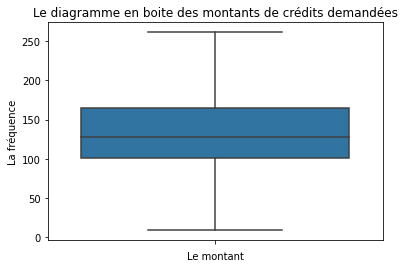

In [ ]:
# LoanAmount
sns.boxplot(y = 'LoanAmount', data = df1)
plt.title("Le diagramme en boite des montants de crédits demandées")
plt.xlabel('Le montant')
plt.ylabel('La fréquence')
plt.show()

In [ ]:
# Remplaçer les outliers de CoapplicantIncome
replace_outliers(df1, 'CoapplicantIncome')

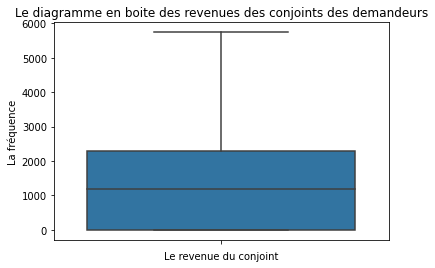

In [ ]:
# CoapplicantIncome
sns.boxplot(y = 'CoapplicantIncome', data = df1)
plt.title("Le diagramme en boite des revenues des conjoints des demandeurs")
plt.xlabel('Le revenue du conjoint')
plt.ylabel('La fréquence')
plt.show()

In [ ]:
# Remplaçer les outliers de ApplicantIncome
replace_outliers(df1, 'ApplicantIncome')

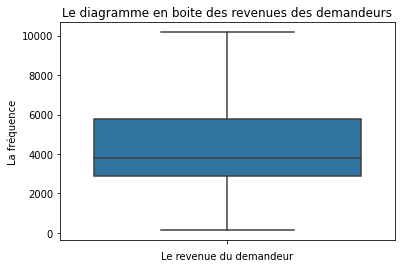

In [ ]:
# ApplicantIncome
sns.boxplot(y = 'ApplicantIncome', data = df1)
plt.title("Le diagramme en boite des revenues des demandeurs")
plt.xlabel('Le revenue du demandeur')
plt.ylabel('La fréquence')
plt.show()

### **5.4. Encodage des variables catégorielles**

#### **5.4.1. Encodage des variables catégorielles nominales**

In [ ]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
# Encodage de la variable Loan_Status
# Y --> 1
# N --> 0
dict_valeurs_loan_status= {'Y':1, 'N':0}

df1['Loan_Status'] = df1['Loan_Status'].map(dict_valeurs_loan_status) 
df1['Loan_Status']

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [ ]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
# Encodage de la variable Gender
# Male --> 1
# Female --> 0
dict_valeurs_gender= {'Male':1, 'Female':0}

df1['Gender'] = df1['Gender'].map(dict_valeurs_gender) 
df1['Gender']

0      1
1      1
2      1
3      1
4      1
      ..
609    0
610    1
611    1
612    1
613    0
Name: Gender, Length: 614, dtype: int64

In [ ]:
df1['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [ ]:
# Encodage de la variable Married
# Yes --> 1
# No --> 0
dict_valeurs_married= {'Yes':1, 'No':0}

df1['Married'] = df1['Married'].map(dict_valeurs_married) 
df1['Married']

0      0
1      1
2      1
3      1
4      0
      ..
609    0
610    1
611    1
612    1
613    0
Name: Married, Length: 614, dtype: int64

In [ ]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
# Encodage de la variable Self_Employed
# No --> 1
# Yes --> 0
dict_valeurs_self_employed= {'No':1, 'Yes':0}

df1['Self_Employed'] = df1['Self_Employed'].map(dict_valeurs_self_employed) 
df1['Self_Employed']

0      1
1      1
2      0
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Self_Employed, Length: 614, dtype: int64

#### **5.4.2. Encodage des variables catégorique ordinales avec LabelEncoding**

In [ ]:
# Liste des variables catégorique ordinales = Dependents, Education, Property_Area

categoriques_ordinales = ['Dependents', 'Education', 'Property_Area']

# On crée une nouvelle instance de LabelEncoder
label_encoder = LabelEncoder()

# On encode les variables
for colonne in df1[categoriques_ordinales]:
    df1[colonne] = label_encoder.fit_transform(df1[colonne])

df1[categoriques_ordinales]



,Dependents,Education,Property_Area
0,0,0,2
1,1,0,0
2,0,0,2
3,0,1,2
4,0,0,2
...,...,...,...
609,0,0,0
610,3,0,0
611,1,0,2
612,2,0,2


## **6. Le résultat de l'étape de pré-traitement des données**

In [ ]:
# Afficher le dataset après le pré-traitement
df1 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,1,5849.0,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,1,4583.0,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,0,3000.0,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,1,2583.0,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,1,6000.0,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,1,2900.0,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,1,4106.0,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,1,8072.0,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,1,7583.0,0.0,187.0,360.0,1.0,2,1


## **7. Modélisation**

In [ ]:
# Créer une copie de dataframe (df1) résltant de la phase de pré-traitement pour l'utiliser dans la phase de modélisation
df_modelisation = df1.copy()

### **7.1. Dévision des données**


- 60% : Données d'entrainement

- 20% : Données de validation

- 20% : Données de test

In [ ]:
# Découper les données en données d'entrainement, de validation et de test avec la fonction train_test_split

y = df_modelisation['Loan_Status']
X = df_modelisation.drop('Loan_Status', axis = 1)

# 100% == 60% -> entrainement et 40% -> test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0, stratify = y)

# 40% -> test == 20% -> validation et 20% -> test 
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 0, stratify = y_test)

# Note : 
# random_state = 0 pour avoir le méme découpage à chaque fois qu'on exécute la cellule
# stratify = y/y_test pour avoir la méme distribution de la variable cible dans le données d'entrainement, de validation et de test


In [ ]:
print("La forme de X_train : ", X_train.shape)
print("La forme de y_train : ", y_train.shape)
print('-'*35)
print("La forme de X_val   : ", X_val.shape)
print("La forme de y_val   : ", y_val.shape)
print('-'*35)
print("La forme de X_test  : ", X_test.shape)
print("La forme de y_test  : ", y_test.shape)

La forme de X_train :  (368, 11)
La forme de y_train :  (368,)
-----------------------------------
La forme de X_val   :  (123, 11)
La forme de y_val   :  (123,)
-----------------------------------
La forme de X_test  :  (123, 11)
La forme de y_test  :  (123,)


In [ ]:
# On vérifie la distribution de la variable cible dans chaque portion : train, val et test

In [ ]:
print("La distribution de Loan_Status dans les données d'entrainement :")
print(y_train.value_counts(normalize=True))

print("-"*65)

print("La distribution de Loan_Status dans les données de validation :")
print(y_val.value_counts(normalize=True))

print("-"*65)

print("La distribution de Loan_Status dans les données de test :")
print(y_test.value_counts(normalize=True))


La distribution de Loan_Status dans les données d'entrainement :
1    0.6875
0    0.3125
Name: Loan_Status, dtype: float64
-----------------------------------------------------------------
La distribution de Loan_Status dans les données de validation :
1    0.691057
0    0.308943
Name: Loan_Status, dtype: float64
-----------------------------------------------------------------
La distribution de Loan_Status dans les données de test :
1    0.682927
0    0.317073
Name: Loan_Status, dtype: float64


### **7.2. Implémentation des models**

#### **7.2.1. LogisticRegression (la régression logistique)**

In [ ]:
log_reg = LogisticRegression(random_state=0, max_iter=500)

# Les hyper-paramétres 
log_reg_hyp = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Trouver les meilleurs hyperparamètres
log_reg_cv = GridSearchCV(log_reg, log_reg_hyp, cv = 5)

# Entrainer le model
log_reg_cv.fit(X_train, y_train)

# Le meilleur score
print("Le meilleur score est :", log_reg_cv.best_score_)

# Les meilleurs hyperparamètres
print("Les meilleurs hyperparamètres sont :", log_reg_cv.best_params_)

# Le meilleur estimateur 
print("Le meilleur estimateur est :", log_reg_cv.best_estimator_)

Le meilleur score est : 0.793631988152536
Les meilleurs hyperparamètres sont : {'C': 1}
Le meilleur estimateur est : LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


#### **7.2.2. Kearest Neighbors (les plus proches voisins)**

In [ ]:
knn = KNeighborsClassifier()

# Les hyper-paramétres 
knn_hyp = {
    'n_neighbors': np.arange(1, 20),
    'metric': ['euclidean', 'manhattan'] 
}

# Trouver les meilleurs hyperparamètres
knn_cv = GridSearchCV(knn, knn_hyp, cv = 5)

# Entrainer le model
knn_cv.fit(X_train, y_train)

# Le meilleur score
print("Le meilleur score est :", knn_cv.best_score_)

# Les meilleurs hyperparamètres
print("Les meilleurs hyperparamètres sont :", knn_cv.best_params_)

# Le meilleur estimateur 
print("Le meilleur estimateur est :", knn_cv.best_estimator_)

Le meilleur score est : 0.6928174750092558
Les meilleurs hyperparamètres sont : {'metric': 'euclidean', 'n_neighbors': 9}
Le meilleur estimateur est : KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')


#### **7.2.3. Random Forest (Forêt aléatoire)**

In [ ]:
rf = RandomForestClassifier(random_state=0)

# Les hyper-paramétres 
rf_hyp = {
    'n_estimators':[5, 10, 20, 50, 100, 200],
    'max_depth':[None, 2, 5, 10, 15, 20]
}

# Trouver les meilleurs hyperparamètres
rf_cv = GridSearchCV(rf, rf_hyp, cv = 5)

# Entrainer le model
rf_cv.fit(X_train, y_train)

# Le meilleur score
print("Le meilleur score est :", rf_cv.best_score_)

# Les meilleurs hyperparamètres
print("Les meilleurs hyperparamètres sont :", rf_cv.best_params_)

# Le meilleur estimateur 
print("Le meilleur estimateur est :", rf_cv.best_estimator_)

Le meilleur score est : 0.7990373935579415
Les meilleurs hyperparamètres sont : {'max_depth': 2, 'n_estimators': 50}
Le meilleur estimateur est : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


#### **7.2.4. Bagging Classifier**

In [ ]:
bc = BaggingClassifier(random_state=0)

# Les hyper-paramétres 
bc_hyp = {
    'n_estimators':[5, 10, 20, 50, 100, 200]
}

# Trouver les meilleurs hyperparamètres
bc_cv = GridSearchCV(bc, bc_hyp, cv = 5)

# Entrainer le model
bc_cv.fit(X_train, y_train)

# Le meilleur score
print("Le meilleur score est :", bc_cv.best_score_)

# Les meilleurs hyperparamètres
print("Les meilleurs hyperparamètres sont :", bc_cv.best_params_)


# Le meilleur estimateur 
print("Le meilleur estimateur est :", bc_cv.best_estimator_)

Le meilleur score est : 0.742095520177712
Les meilleurs hyperparamètres sont : {'n_estimators': 200}
Le meilleur estimateur est : BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=200,
                  n_jobs=None, oob_score=False, random_state=0, verbose=0,
                  warm_start=False)


#### **7.2.5. Decision Tree Classifier (Arbre de décision)**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state = 0)

# Les hyper-paramétres 
dtree_hyp = {
    'criterion':['gini','entropy'],
    'max_depth': np.arange(1, 15)
}

# Trouver les meilleurs hyperparamètres
dtree_cv = GridSearchCV(dtree, dtree_hyp, cv = 5)

# Entrainer le model
dtree_cv.fit(X_train, y_train)

# Le meilleur score
print("Le meilleur score est :", dtree_cv.best_score_)

# Les meilleurs hyperparamètres
print("Les meilleurs hyperparamètres sont :", dtree_cv.best_params_)

# Le meilleur estimateur 
print("Le meilleur estimateur est :", dtree_cv.best_estimator_)

Le meilleur score est : 0.7990373935579415
Les meilleurs hyperparamètres sont : {'criterion': 'gini', 'max_depth': 1}
Le meilleur estimateur est : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


In [ ]:
svc = SVC()

svc_hypr = {
              'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']
            }
# Trouver les meilleurs hyperparamètres
scv_cv = GridSearchCV(svc, svc_hypr, cv = 5)

# Entrainer le model
scv_cv.fit(X_train, y_train)

# Le meilleur score
print("Le meilleur score est :", scv_cv.best_score_)

# Les meilleurs hyperparamètres
print("Les meilleurs hyperparamètres sont :", scv_cv.best_params_)

# Le meilleur estimateur 
print("Le meilleur estimateur est :", scv_cv.best_estimator_)

Le meilleur score est : 0.6875231395779342
Les meilleurs hyperparamètres sont : {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Le meilleur estimateur est : SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


#### **7.3. Évaluation des performances et choix du modèle**

In [ ]:
def model_evaluation(model, features, label):
    """
    Fonction qui permet d'évaluer les performances d'un modèle
    """
    
    pred = model.predict(features)
    score = accuracy_score(label, pred)
    print('Score global du modèle :', score)

In [ ]:
# Liste des models à évaluer
list_models = [
                log_reg_cv.best_estimator_,
                knn_cv.best_estimator_,
                rf_cv.best_estimator_,
                bc_cv.best_estimator_,
                dtree_cv.best_estimator_,
                scv_cv.best_estimator_
                ]

for model in list_models:
  print('Modèle ' + str(model))
  model_evaluation(model, X_val, y_val)
  print('-'*90)

Modèle LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Score global du modèle : 0.8373983739837398
------------------------------------------------------------------------------------------
Modèle KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')
Score global du modèle : 0.6991869918699187
------------------------------------------------------------------------------------------
Modèle RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_sampl

#### **7.4. Performance du meilleur modèle sur les données de test**

In [ ]:
accuracy_score(y_test, log_reg_cv.best_estimator_.predict(X_test))

0.8130081300813008